# Accounting Fraud Detection

test version

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#### アンダーサンプル済みのデータファイル読み込み

In [2]:
data = pd.read_csv("./undesample.csv")
data.head()

,Class,dt1,dt2,dt3,dt4,dt5,dt6,dt7,dt8,dt9,dt10,dt11,dt12,dt13,dt14,Acc,LI
0,1,35455,8230,1766,23340,16467,44836,6493,-32,3949,18755,0,-1700,0,18988,-0.027824,0.545566
1,1,1292,796,0,14,535,807,133,2,118,715,0,4071000,0,756,-0.009700,0.266648
2,1,805,-190,-3,973,-276,-1209,9,-1,-81,1076,-1848,-19500,12400,1081,0.007475,0.373508
3,1,65696,21972,1633,3416,30676,123989,6181,477,10977,24188,1649,4923600,0,35020,-0.012113,0.666507
4,1,13329,7437,-1,-10846,4667,28063,2282,6,5915,10453,-10138,32778600,0,8662,-0.055699,0.703912


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns  == 'Class']

X_train, X_test, y_train, y_test= train_test_split(X ,y,test_size = 0.3,random_state = 0)

#### ロジスティック回帰適用
- L2正則化　C=10

In [4]:
lr = LogisticRegression(C = 10, penalty = 'l2')
lr.fit(X_train,y_train.values.ravel())
lr.score(X_test,y_test.values.ravel())

C:\Users\saito\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6216867469879518

#### 再現率

In [5]:
from sklearn.metrics import recall_score
y_pred = lr.predict(X_test.values)
print(recall_score(y_test,y_pred))

0.594847775175644


#### 適合率

In [6]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.6430379746835443

#### 混同行列

In [7]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[262 141]
 [173 254]]


In [8]:
lr0 = LogisticRegression(C = .001, penalty = 'l1')
#lr1 = LogisticRegression()
lr0.fit(X_train,y_train)
lr0.score(X_test,y_test)

C:\Users\saito\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saito\Anaconda3\envs\base2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6204819277108434

#### 交差検証法もどき　 K_fold_scores

In [9]:
#fold = KFold(len(y_test_undersample),5,shuffle=True) 

In [10]:
c_param_range = [0.01,0.1,1,10,100,1000]



### ROC曲線と Precision-Recall 曲線



C:\Users\saito\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


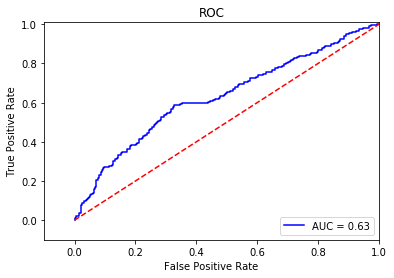

In [12]:
from sklearn.metrics import roc_curve, auc
# ROC CURVE
# This code refers to kaggle page
#    https://www.kaggle.com/mlg-ulb/creditcardfraud

lr = LogisticRegression(C = 0.001, penalty = 'l1')
y_pred_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('ROC')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()